<a href="https://colab.research.google.com/github/Duckling1554/diploma_levchenko/blob/main/bad_drivers_diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Импорты нужных библиотек
import pandas as pd
import string
import matplotlib.pyplot as plt

In [2]:
file = '/content/drive/MyDrive/Colab Notebooks/Diploma/bad_drivers.csv'
df = pd.read_csv(file)
df = df.drop('OLD_MDM', axis=1)
df = df.sort_values(by=['MAIN_DRIVER_ID', 'RATING_NUM'])
# df_counts = df.groupby(['MAIN_DRIVER_ID', 'RATING']).count().reset_index().rename(columns={'RATING_NUM': 'COUNT_RATINGS'}).sort_values(by=['MAIN_DRIVER_ID', 'RATING'])

In [3]:
#Кол-во рассматриваемых на 1ом этапе водителей
TOTAL_DRIVERS = 20

UniqueNames = df.MAIN_DRIVER_ID.unique()[:TOTAL_DRIVERS]
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.MAIN_DRIVER_ID == key]

In [4]:
#Как выглядит датафрейм
df

,MAIN_DRIVER_ID,RATING,RATING_NUM
39206,5339631,5,1
39207,5339631,5,2
39208,5339631,1,3
39209,5339631,1,4
39210,5339631,5,5
...,...,...,...
8563,4290346124,5,372
8564,4290346124,5,373
8565,4290346124,5,374
8566,4290346124,5,375


# Временные ряды оценок водителей:

In [5]:
#Импорты нужных библиотек
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = make_subplots(rows=TOTAL_DRIVERS, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.002)
count = 1
for key in DataFrameDict.keys():
  fig.add_trace(go.Bar(x=DataFrameDict[key]['RATING_NUM'], y=DataFrameDict[key]['RATING'], name=f'{key}'), row=count, col=1)
  
  fig.append_trace(go.Scatter(x=DataFrameDict[key]['RATING_NUM']
                              , y=[DataFrameDict[key]['RATING'].mean() for x in DataFrameDict[key]['RATING_NUM']]
                              , line_color="red", name=f'mean'), count,1)
  fig.append_trace(go.Scatter(x=DataFrameDict[key]['RATING_NUM']
                              , y=[DataFrameDict[key]['RATING'].mean()+2*DataFrameDict[key]['RATING'].std() for x in DataFrameDict[key]['RATING_NUM']]
                              , line_color="yellow", name=f'+2 std'), count,1)
  fig.append_trace(go.Scatter(x=DataFrameDict[key]['RATING_NUM']
                              , y=[DataFrameDict[key]['RATING'].mean()-2*DataFrameDict[key]['RATING'].std() for x in DataFrameDict[key]['RATING_NUM']]
                              , line_color="yellow", name=f'- 2 std'), count,1)

  # fig.add_trace(go.Box(y=DataFrameDict[key]['RATING'], name=f'{key}'), row=count, col=2)
  count += 1
fig.update_layout(height=100*TOTAL_DRIVERS, width=2000,
                  title_text="Временной ряд для 20 плохих водителей", showlegend=False )
fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=10
)
fig.update_yaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    tickmode='linear',
    ticklen=5
)
fig.show()

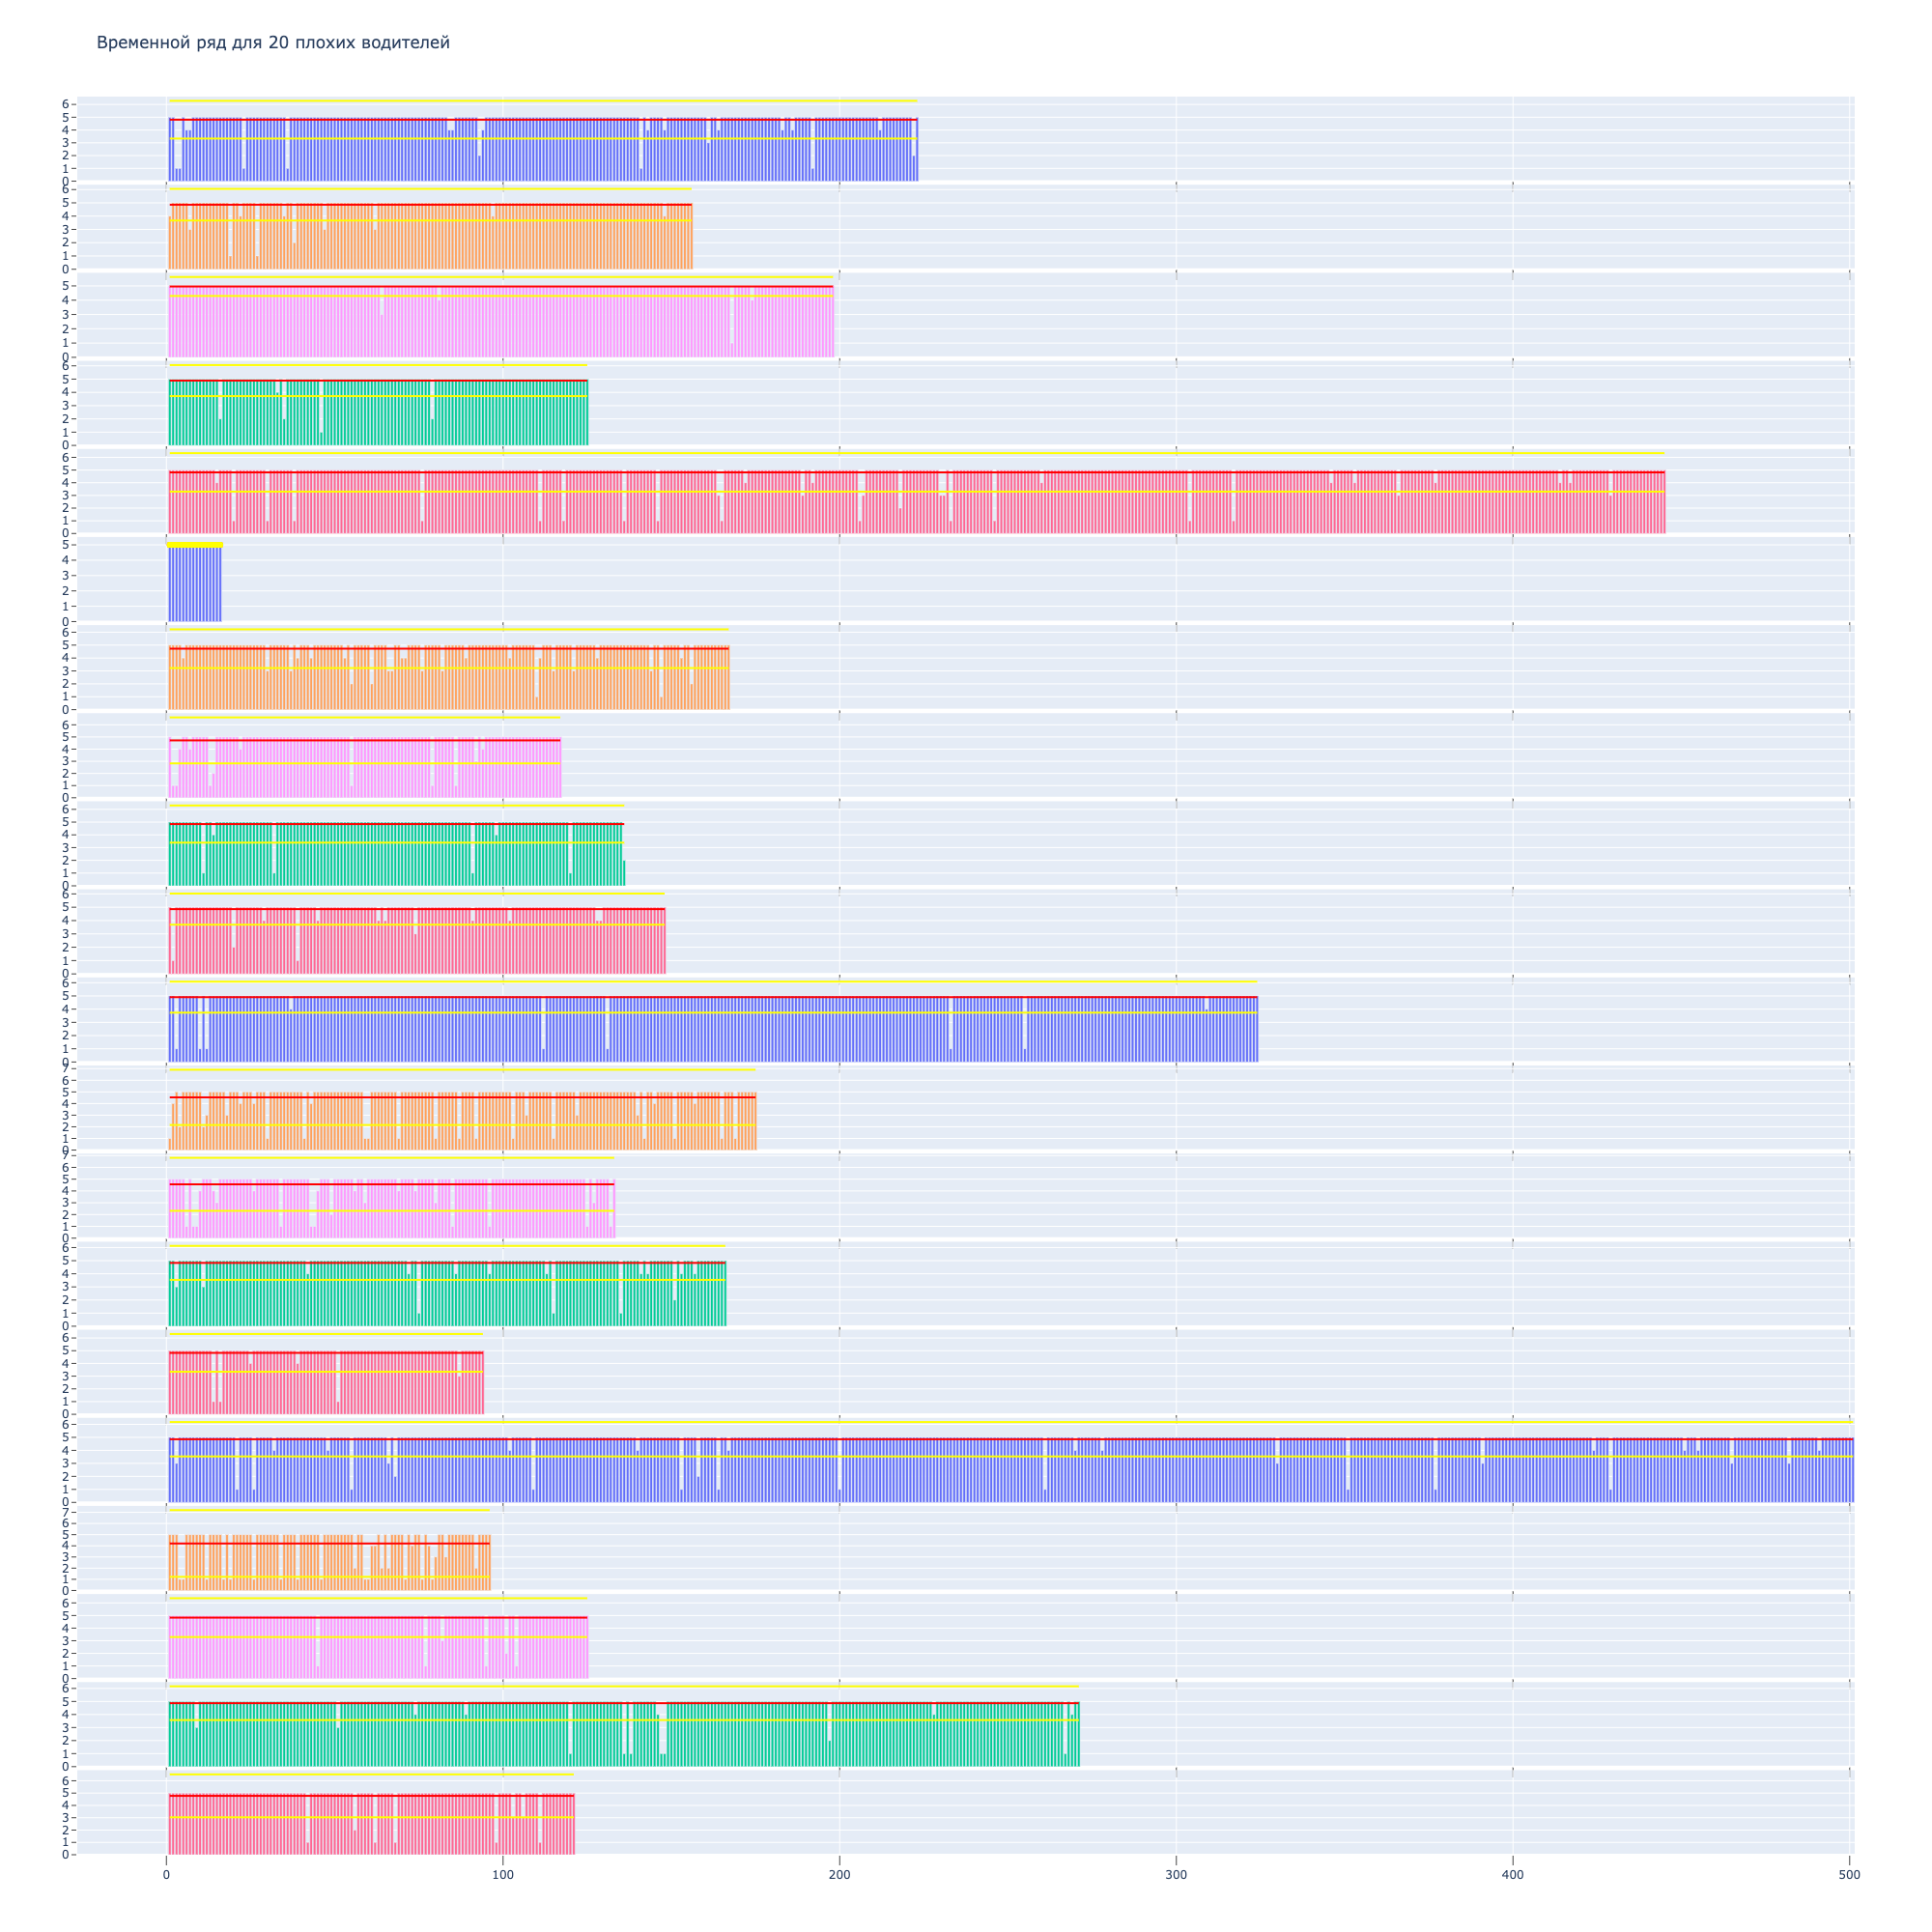

In [ ]:
fig = make_subplots(rows=TOTAL_DRIVERS, cols=2,
                    # shared_xaxes=True,
                    vertical_spacing=0.001)
count = 1
for key in DataFrameDict.keys():
  fig.add_trace(go.Histogram(x=DataFrameDict[key]['RATING'], name=f'{key}'), row=count, col=1)
  fig.add_trace(go.Box(y=DataFrameDict[key]['RATING'], name=f'{key}'), row=count, col=2)

  count += 1
fig.update_layout(height=100*TOTAL_DRIVERS, width=800,
                  title_text="Гистограммы и ящики с усами для тех же 20 водителей", showlegend=False )
fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    tickmode='linear',
    ticklen=10
)
fig.update_yaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=5
)
fig.show()

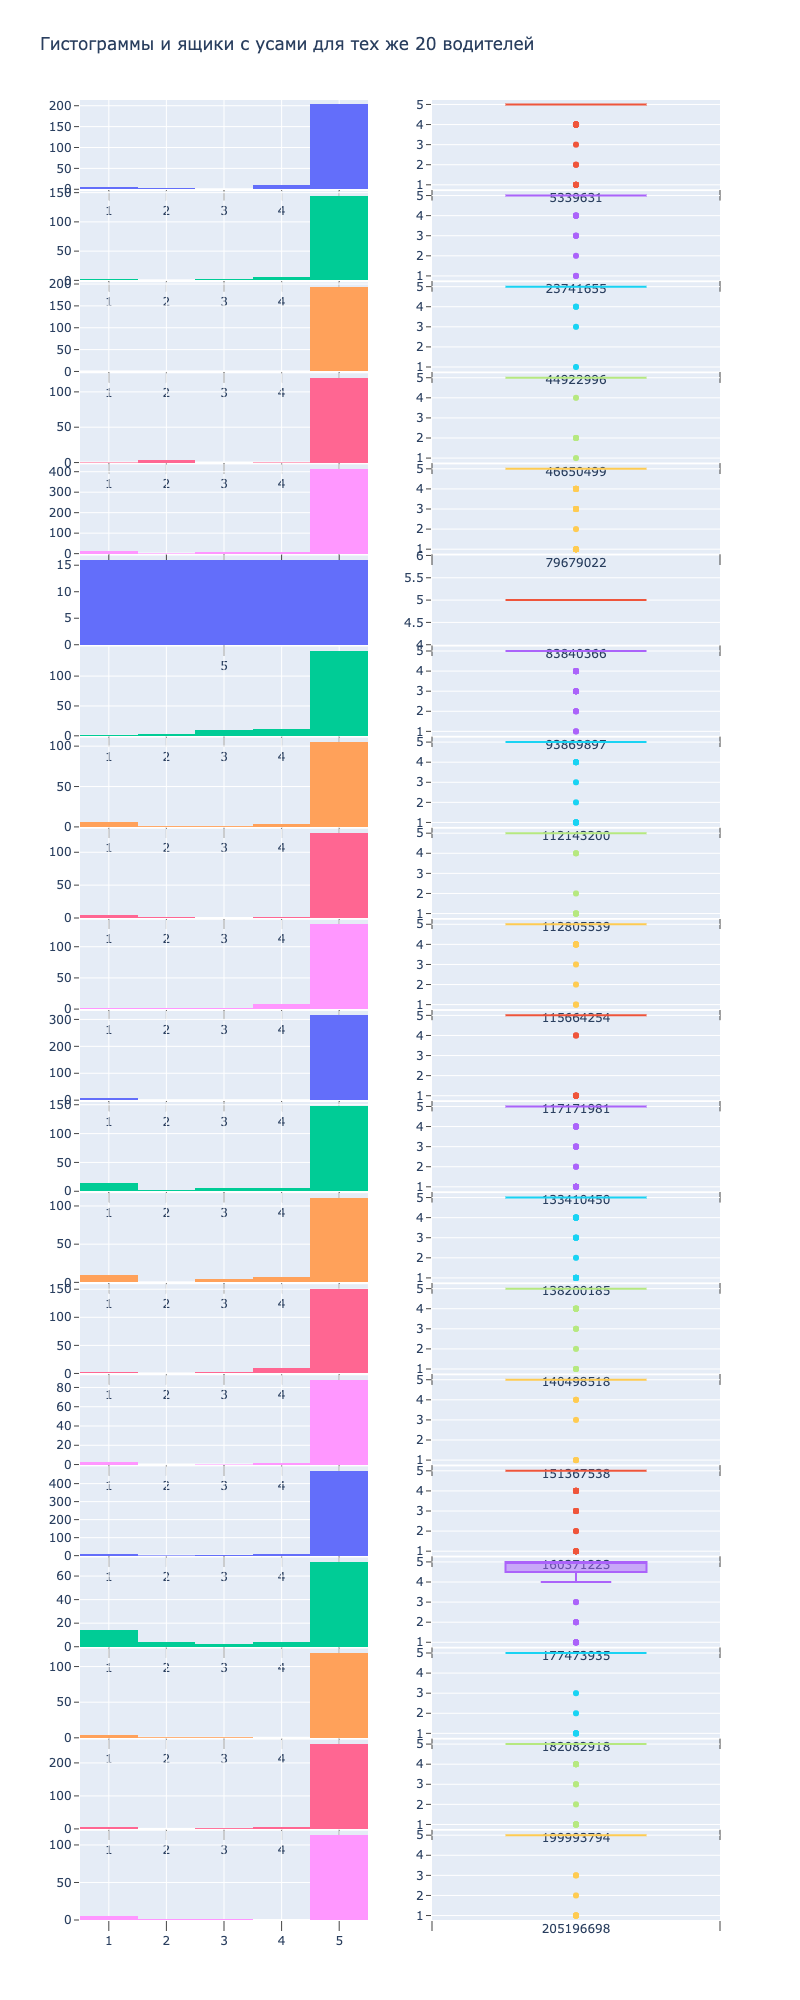

## Гистограмма и ящик с усами для всех оценок:

In [ ]:
#Распределение оценок
import plotly.express as px
fig = px.histogram(df, x="RATING")
fig.show()

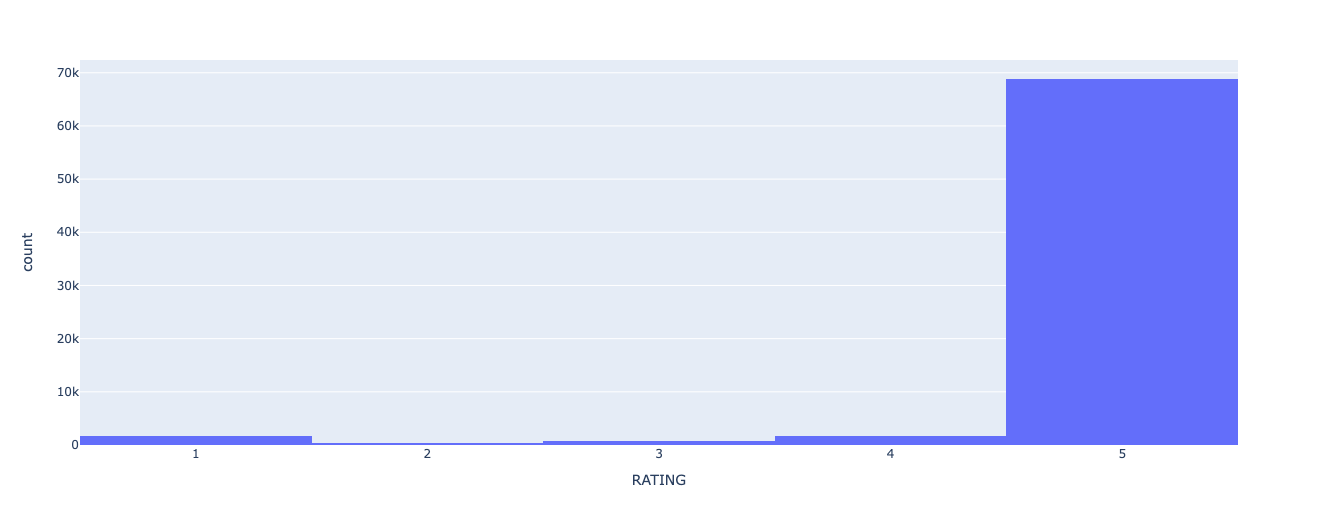

In [ ]:
import plotly.express as px
fig = px.box(df, y="RATING")
fig.show()

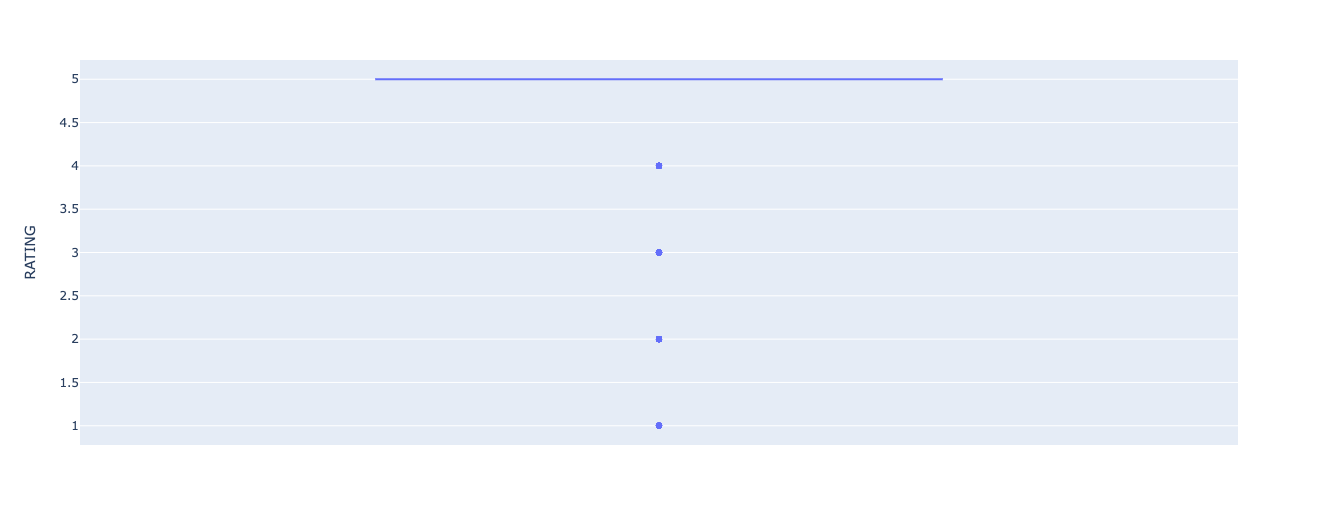

# Исследование размера окна:

## Строю окно M для водителя 5339631:

In [8]:
import numpy as np

In [9]:
M = 100 #Для начала возьмем M=100

test_df = df.loc[df['MAIN_DRIVER_ID']== 5339631].copy()

In [10]:
test_df['NEW_RATING'] = test_df['RATING_NUM'].apply(lambda x: 4.9 if x<=30 else ((test_df['RATING'][x-M:x]).mean() if x>=M else (test_df['RATING'][0:x-1]).mean()))

In [ ]:
fig = make_subplots(rows=1, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.002)
count = 1
fig.add_trace(go.Scatter(x=test_df['RATING_NUM'], y=test_df['NEW_RATING'], name=f'{key}'), row=count, col=1)
fig.update_layout(height=20*TOTAL_DRIVERS, width=2000,
                  title_text="Рейтинг водителя при М = 100", showlegend=False )
fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=10
)
fig.update_yaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    tickmode='linear',
    ticklen=5
)
fig.show()

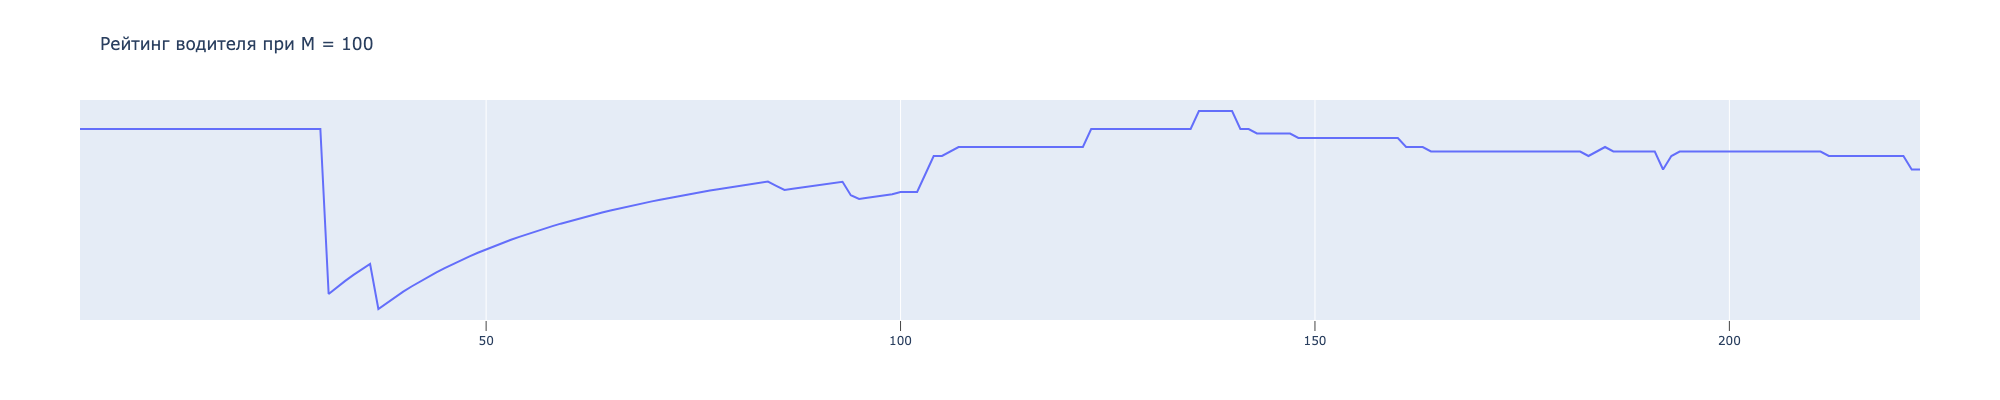

In [ ]:
print(f'Var: {test_df["NEW_RATING"].var()}')
print(f'Std: {test_df["NEW_RATING"].std()}')
print(f'Mean: {test_df["NEW_RATING"].mean()}')

Var: 0.009916024087472065
Std: 0.09957923522236986
Mean: 4.81296032902698


Строим для 10 <= M <= 300 с шагом 5:

In [ ]:
test_df = df.loc[df['MAIN_DRIVER_ID']== 5339631].copy()

In [ ]:
M = np.arange(10,301,step=5)

mDict = {m : pd.DataFrame for m in M}

for m in M:
  mDict[m] = test_df.copy()
  mDict[m]['NEW_RATING'] = mDict[m]['RATING_NUM'].apply(lambda x: 4.9 if x<=30 else ((mDict[m]['RATING'][x-m:x]).mean() if x>=m else (mDict[m]['RATING'][0:x-1]).mean()))

In [ ]:
fig = make_subplots(rows=len(M), cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.002)
count = 1
for m in M:
  fig.add_trace(go.Scatter(x=mDict[m]['RATING_NUM'], y=mDict[m]['NEW_RATING'], name=f'{m}'), row=count, col=1)
  count += 1
fig.update_layout(height=100*len(M), width=2000,
                  title_text="Рейтинг водителя в зависимости от размера окна М", showlegend=False )
fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=10
)
fig.update_yaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    tickmode='linear',
    ticklen=5
)
fig.show()

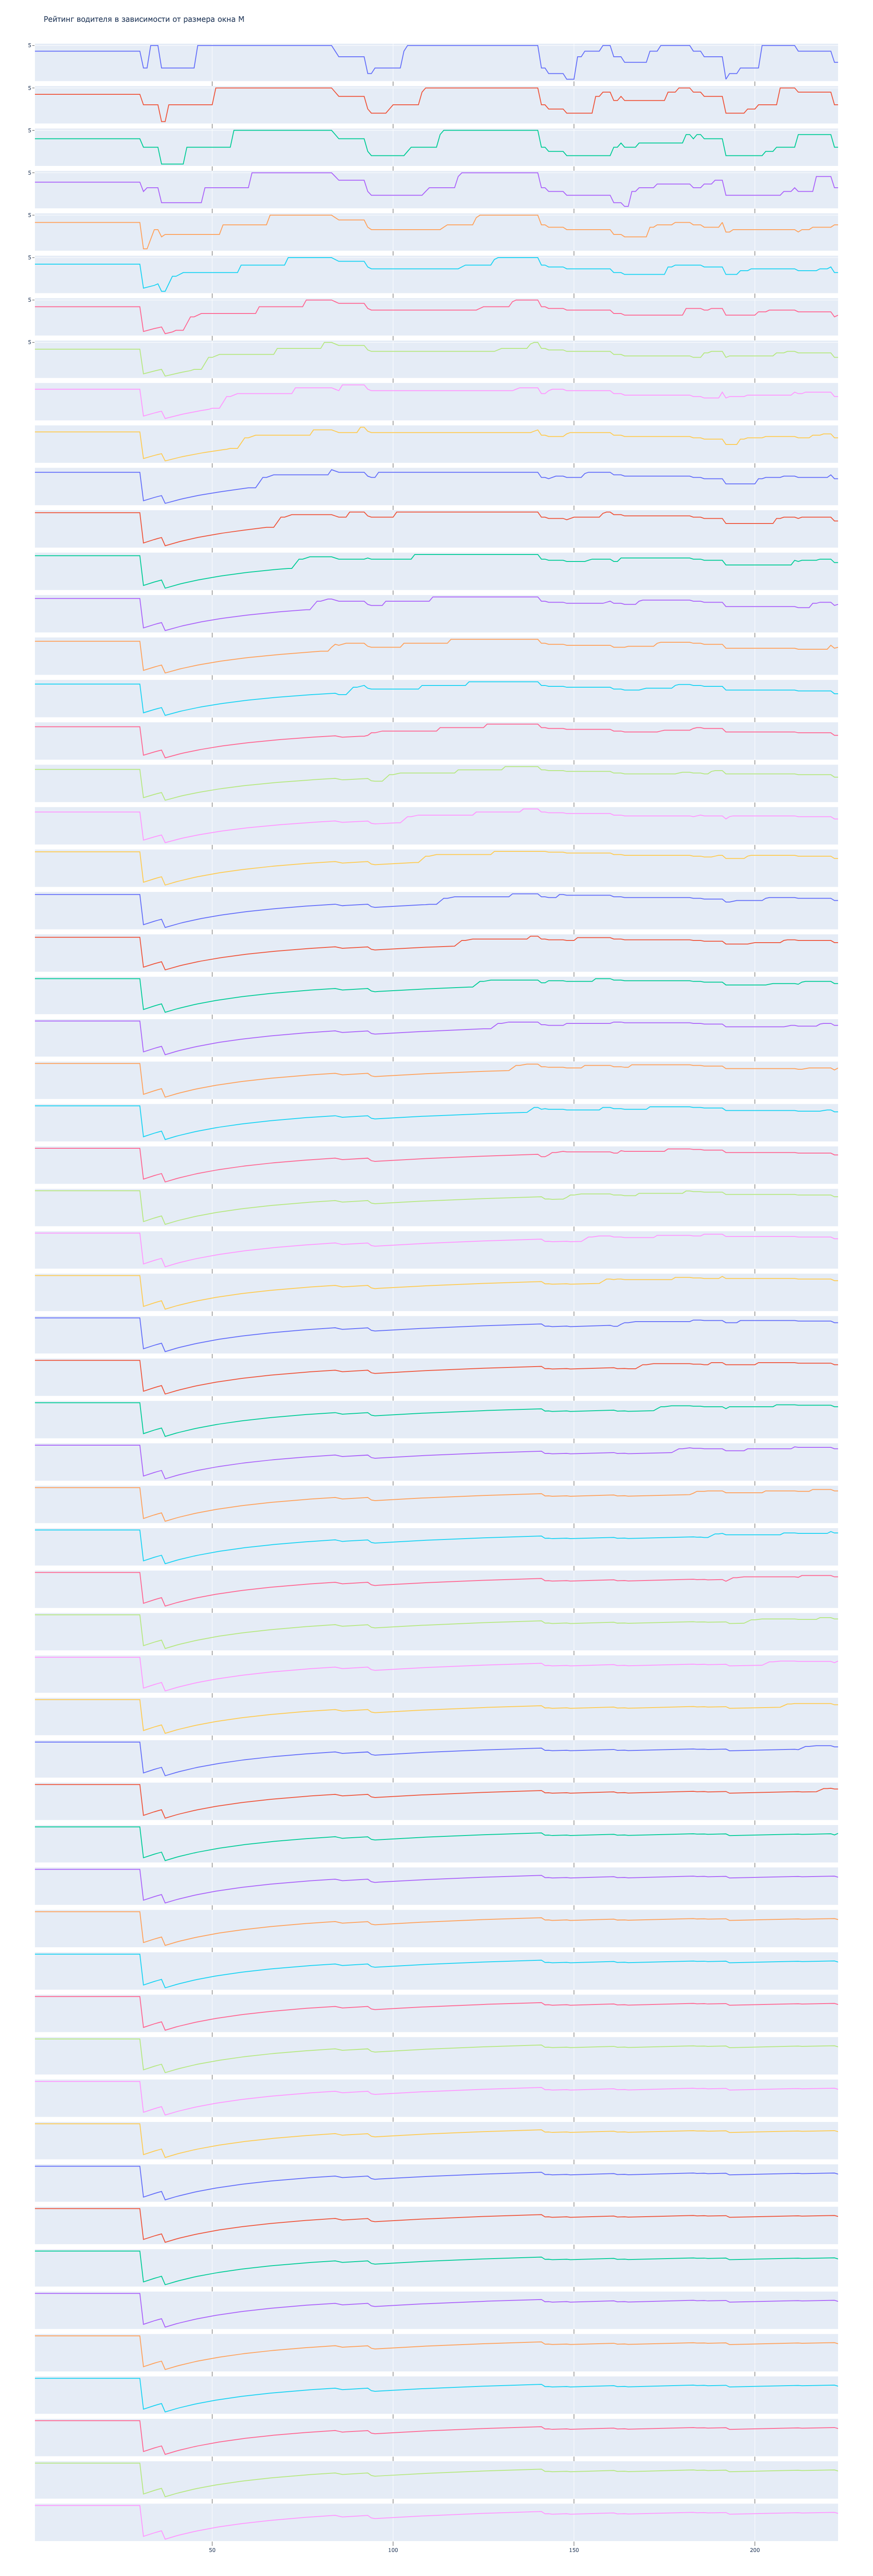

In [ ]:
statDict = {}

for m in M:
  statDict[m] = [mDict[m]['NEW_RATING'].var(), mDict[m]['NEW_RATING'].std(), mDict[m]['NEW_RATING'].mean()]

In [ ]:
import plotly.express as px
import numpy as np
print('Зависимость дисперсии от М')
fig = px.line(x=M, y=[statDict[m][0] for m in M], labels={'x':'M', 'y':'Var'})
fig.show()

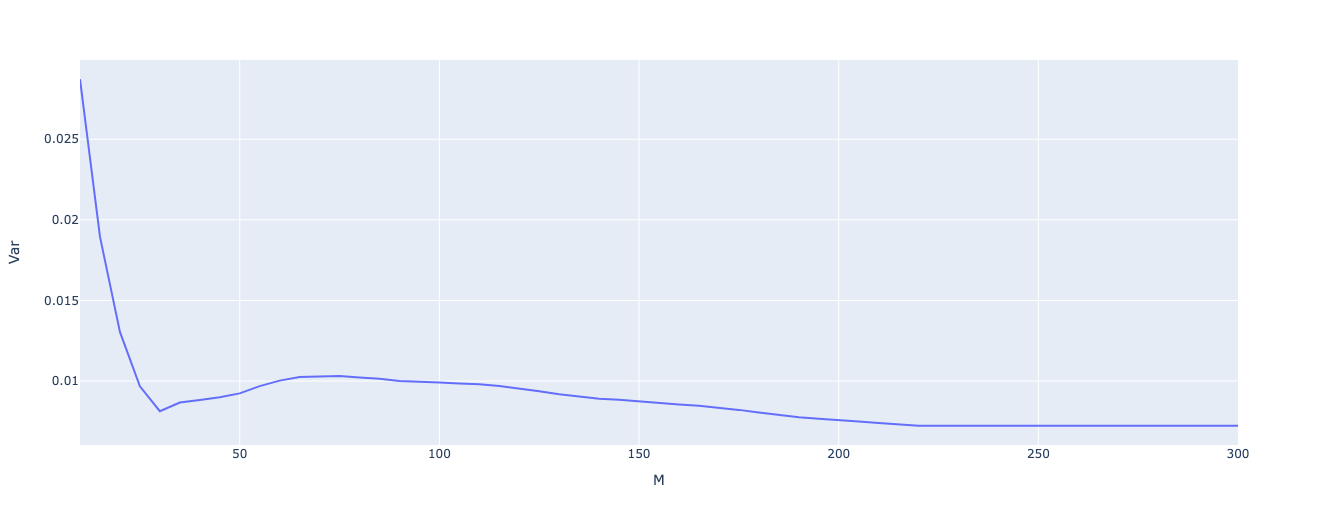

## Делаем то же самое для всех водителей:

In [ ]:
#@title
M = np.arange(10,301,step=5) #берем М от 10 до 300 с шагом 5

TOTAL_DRIVERS = 500 #возьмем 500 водителей

UniqueNames = df.MAIN_DRIVER_ID.unique()[:TOTAL_DRIVERS]
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.MAIN_DRIVER_ID == key]


mDict = {m : pd.DataFrame for m in M}

for m in M:
  mDict[m] = test_df.copy()
  mDict[m]['NEW_RATING'] = mDict[m]['RATING_NUM'].apply(lambda x: 4.9 if x<=30 else ((mDict[m]['RATING'][x-m:x]).mean() if x>=m else (mDict[m]['RATING'][0:x-1]).mean()))

totalStatDict = {}
for key in DataFrameDict.keys():
  mDict = {m : pd.DataFrame for m in M}
  for m in M:
    mDict[m] = DataFrameDict[key].copy()
    mDict[m]['NEW_RATING'] = mDict[m]['RATING_NUM'].apply(lambda x: 4.9 if x<=30 else ((mDict[m]['RATING'][x-m:x]).mean() if x>=m else (mDict[m]['RATING'][0:x-1]).mean()))

  totalStatDict[key] = [mDict[m]['NEW_RATING'].var() for m in M]


In [ ]:
totalStatDict = {m: [] for m in M}

for m in M:
  for key in DataFrameDict.keys():
    df_copy = DataFrameDict[key].copy()
    rating = df_copy['RATING_NUM'].apply(lambda x: 4.9 if x<=30 else ((df_copy['RATING'][x-m:x]).mean() if x>=m else (df_copy['RATING'][0:x-1]).mean()))
    
    totalStatDict[m].append(rating.var())

In [ ]:
import plotly.express as px
import numpy as np
from statistics import mean

print('Зависимость дисперсии от М (на всех водителях)')
res_var = [mean(totalStatDict[m]) for m in M]

fig = px.line(x=M, y=res_var, labels={'x':'M', 'y':'Var'})

fig.update_layout(title_text="Var to M", showlegend=False )
fig.show()

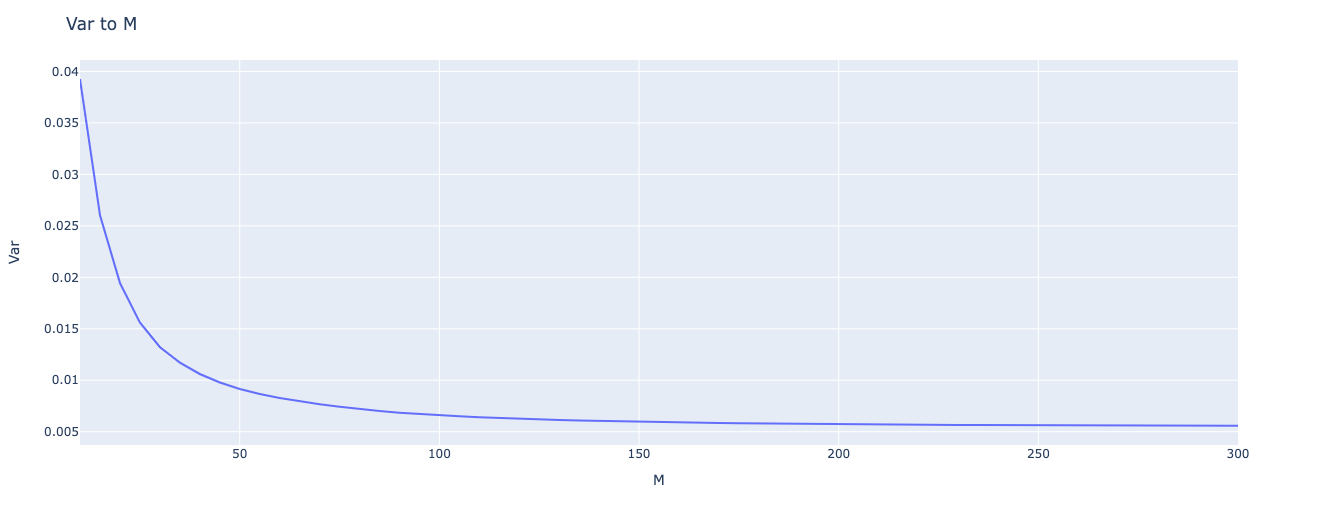